In [21]:
from sklearn.model_selection import train_test_split


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pydataset
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer

import warnings
warnings.filterwarnings('ignore')

import env
import wrangle

import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
import pandas as pd

In [2]:
from wrangle import get_connection
from wrangle import wrangle_zillow
from wrangle import get_zillow_data

df = get_zillow_data()
df = wrangle_zillow(df)
df.head()

,propertylandusedesc,bedrooms,bathrooms,area,taxvalue,yearbuilt,taxamount,county
4,Single Family Residential,4,2.0,3633,296425,2005,6941.39,6037
6,Single Family Residential,3,4.0,1620,847770,2011,10244.94,6037
7,Single Family Residential,3,2.0,2077,646760,1926,7924.68,6037
11,Single Family Residential,0,0.0,1200,5328,1972,91.60,6037
14,Single Family Residential,0,0.0,171,6920,1973,255.17,6037


In [3]:
def split_data(df):
    train_validate, test = train_test_split(df, test_size=.2, random_state=123)
    train, validate = train_test_split(train_validate,
                                       test_size=.3,
                                       random_state=123)
    return train, validate, test

In [4]:
train, validate, test = split_data(df)

print(f'train{train.shape}')
print(f'validate{validate.shape}')
print(f'test{test.shape}')

train(1198531, 8)
validate(513657, 8)
test(428047, 8)


In [5]:
train_scaled = train.copy()


In [8]:
# make, fit, use:
columns_to_scale = ['bedrooms', 'bathrooms','taxvalue', 'area']
# make the object, put it into the variable scaler
scaler = MinMaxScaler()
# fit the object to my data:
train_scaled[columns_to_scale] = scaler.fit_transform(train[columns_to_scale])


Text(0, 0.5, 'Count')

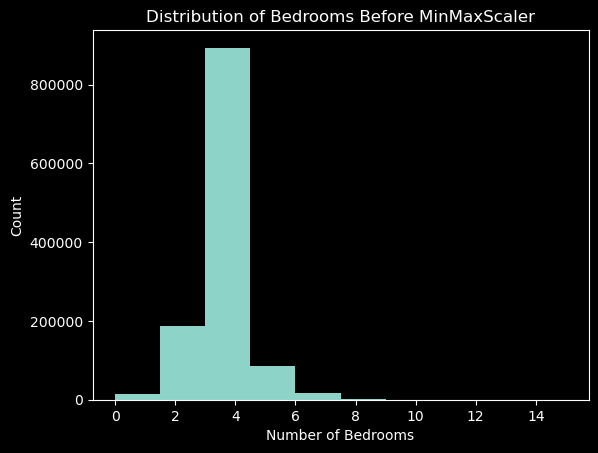

In [9]:
plt.hist(train.bedrooms)
plt.title('Distribution of Bedrooms Before MinMaxScaler')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

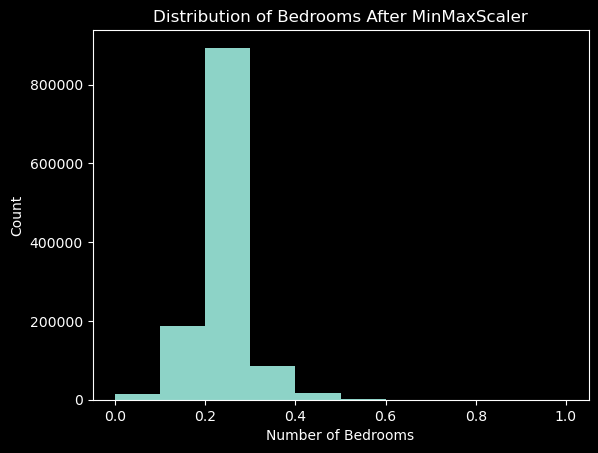

In [10]:
plt.hist(train_scaled.bedrooms)
plt.title('Distribution of Bedrooms After MinMaxScaler')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')

In [11]:
def visualize_scaler(scaler, df, columns_to_scale, bins=10):
    fig, axs = plt.subplots(len(columns_to_scale), 2, figsize=(16,9))
    df_scaled = df.copy()
    df_scaled[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
    for (ax1, ax2), col in zip(axs, columns_to_scale):
        ax1.hist(df[col], bins=bins)
        ax1.set(title=f'{col} before scaling', xlabel=col, ylabel='count')
        ax2.hist(df_scaled[col], bins=bins)
        ax2.set(title=f'{col} after scaling with {scaler.__class__.__name__}', xlabel=col, ylabel='count')
    plt.tight_layout()
#    return fig, axs

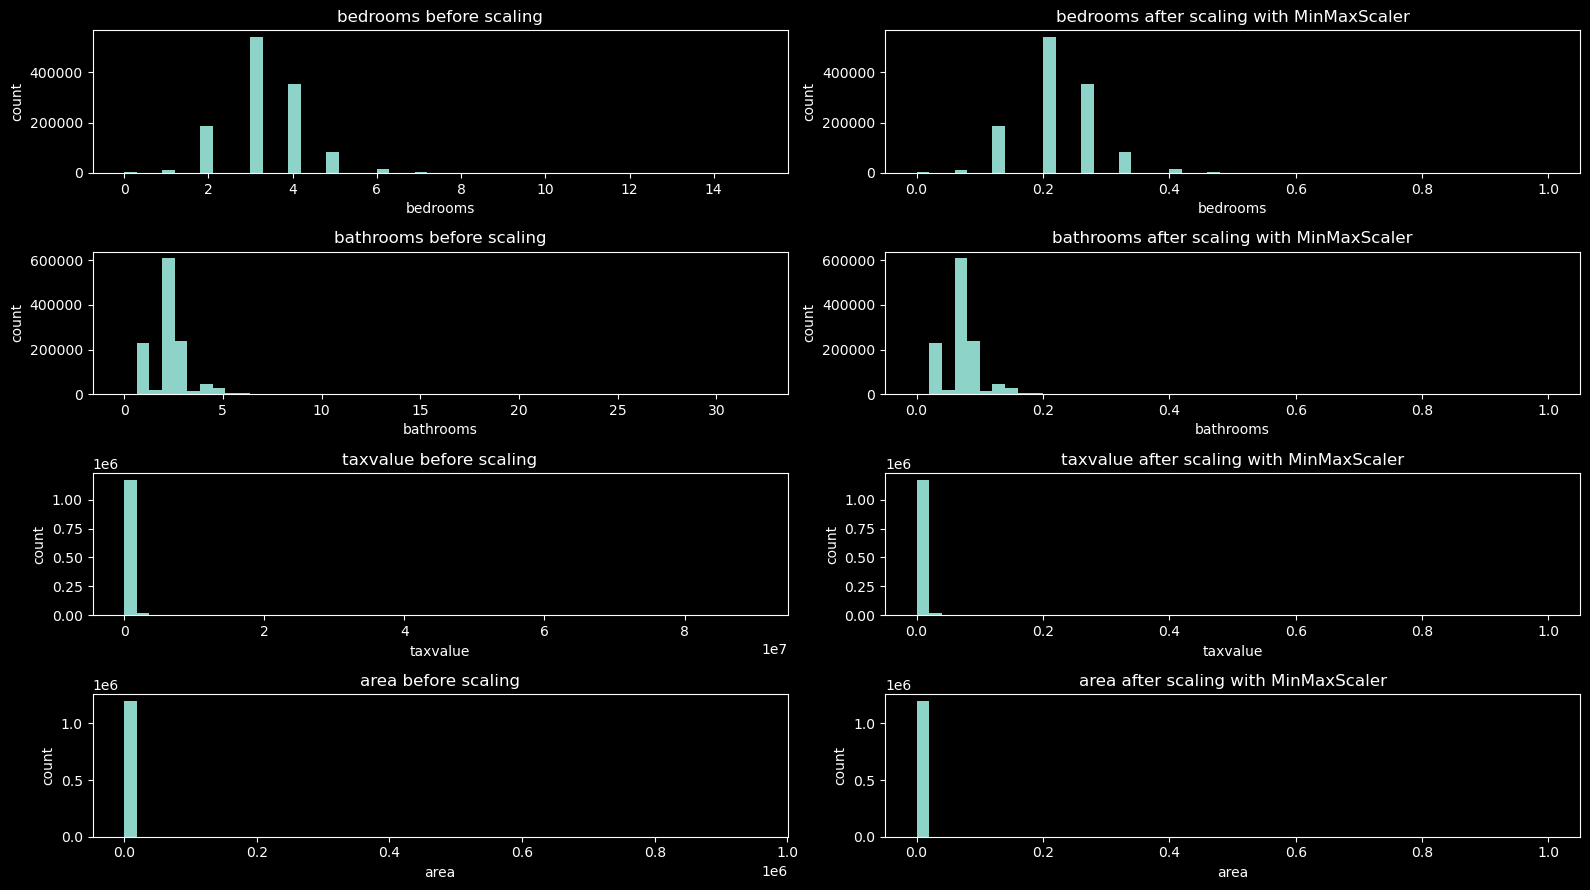

In [12]:
# MinMaxScaler Applied
visualize_scaler(scaler=MinMaxScaler(), 
                 df=train, 
                 columns_to_scale=columns_to_scale, 
                 bins=50)

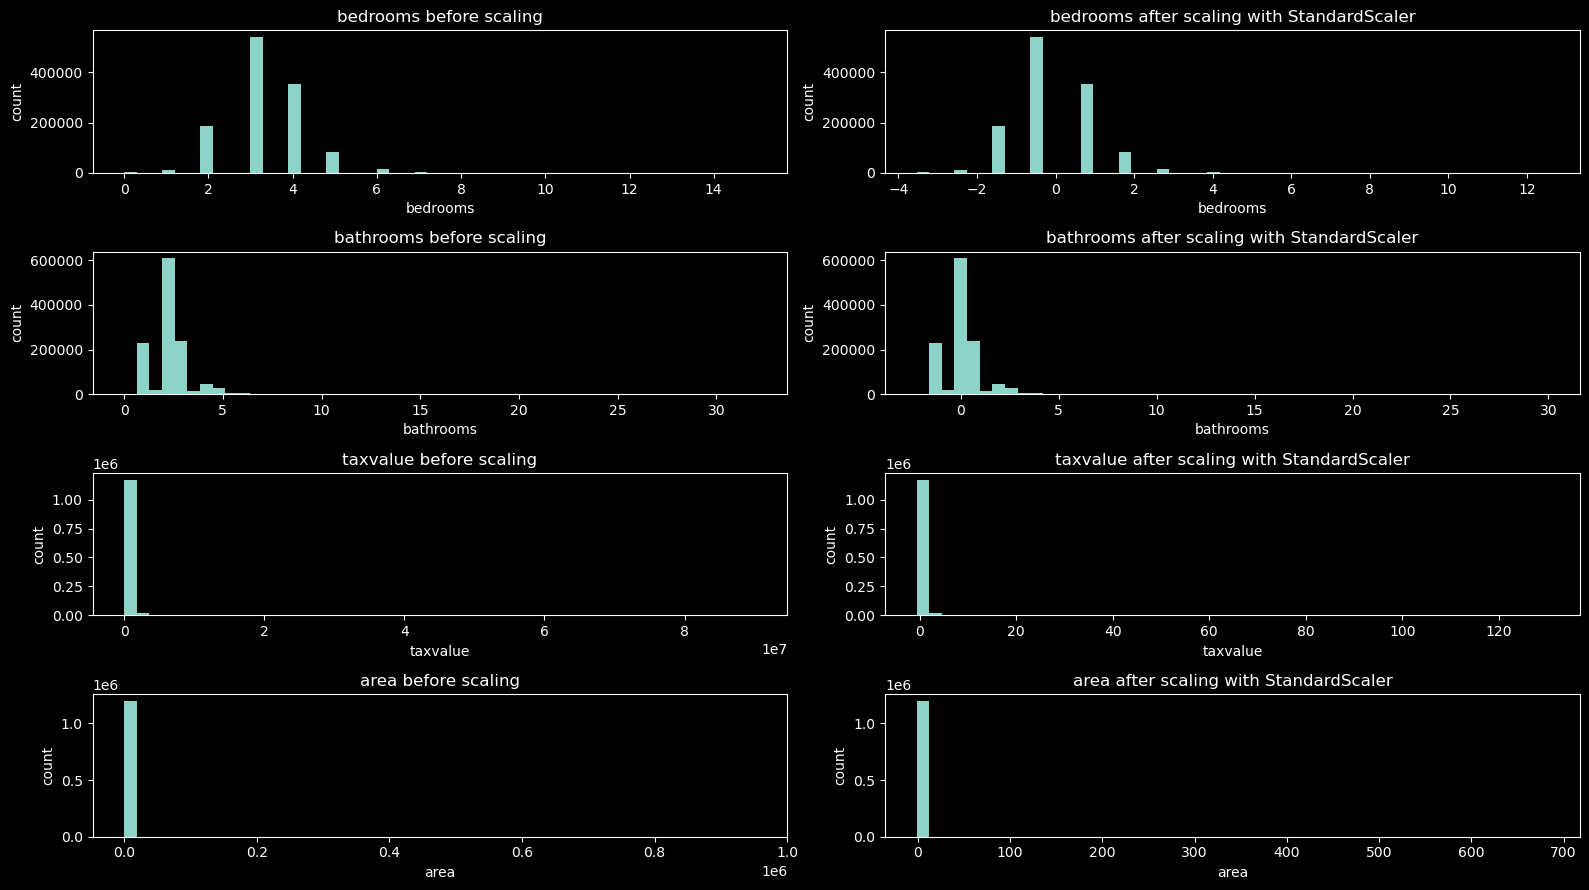

In [13]:
# StandardScaler Applied
visualize_scaler(scaler=StandardScaler(), df=train, columns_to_scale=columns_to_scale, bins=50)


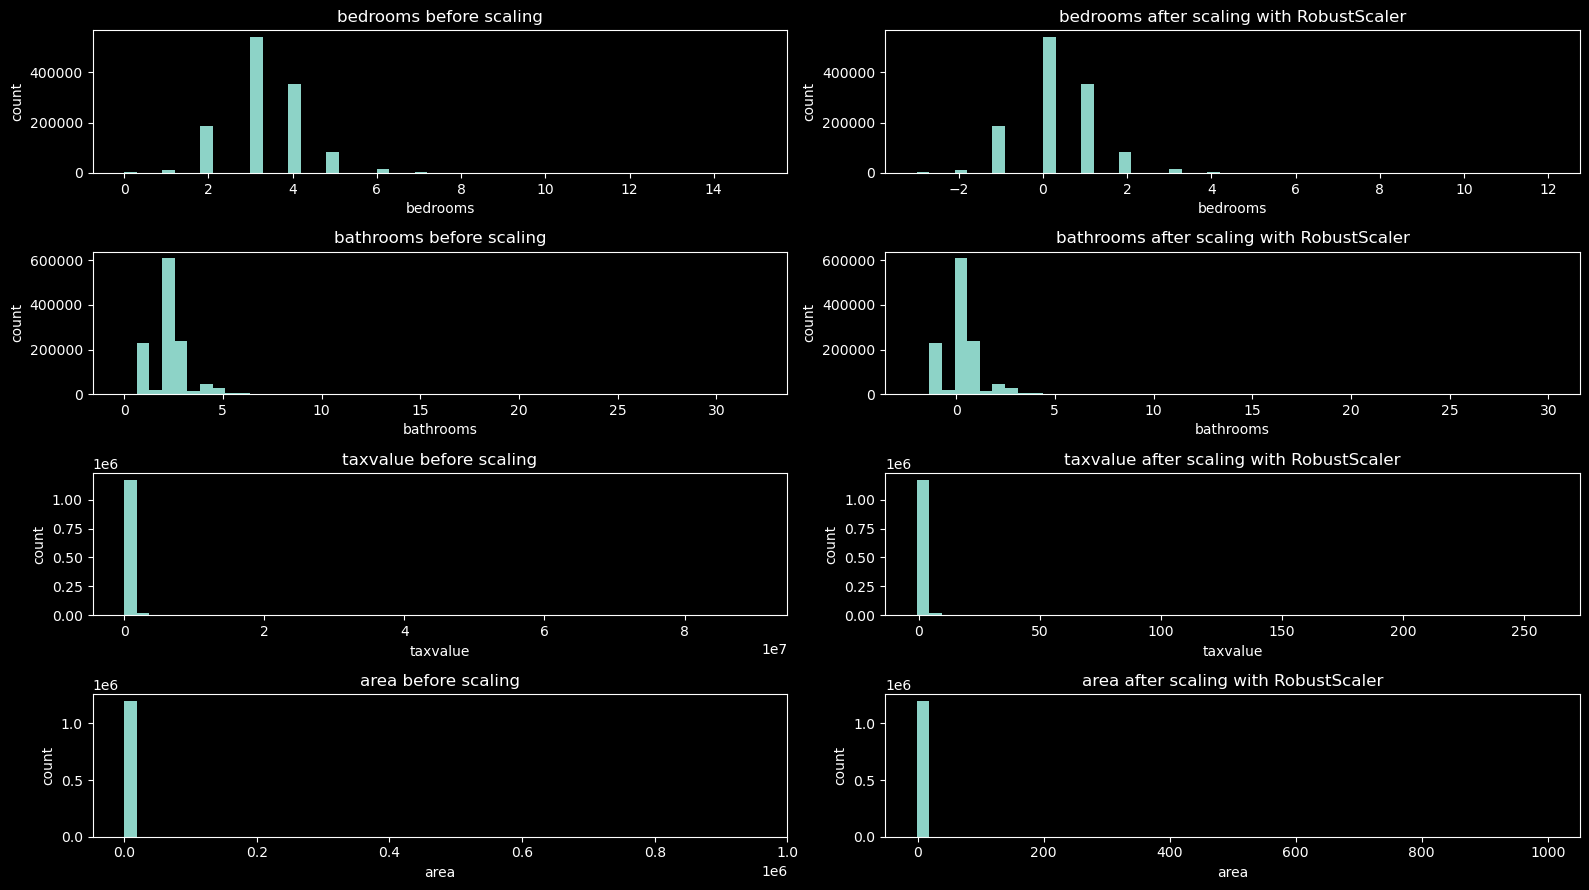

In [14]:
# RobustScaler Applied
visualize_scaler(scaler=RobustScaler(), df=train, columns_to_scale=columns_to_scale, bins=50)


In [16]:
scaler = MinMaxScaler()
original_data = train[['taxvalue']]
scaled_data = scaler.fit_transform(original_data)

# 2. Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

In [17]:
scaled_data[:5]


array([[0.00212395],
       [0.01491526],
       [0.00395423],
       [0.0019409 ],
       [0.00602048]])

In [18]:
original_data[:5]


,taxvalue
1567873,191578
1218138,1345206
339661,356648
1017133,175069
40250,543000


In [19]:
scaler.inverse_transform(scaled_data)[:5]


array([[ 191578.],
       [1345206.],
       [ 356648.],
       [ 175069.],
       [ 543000.]])

# 3. Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.


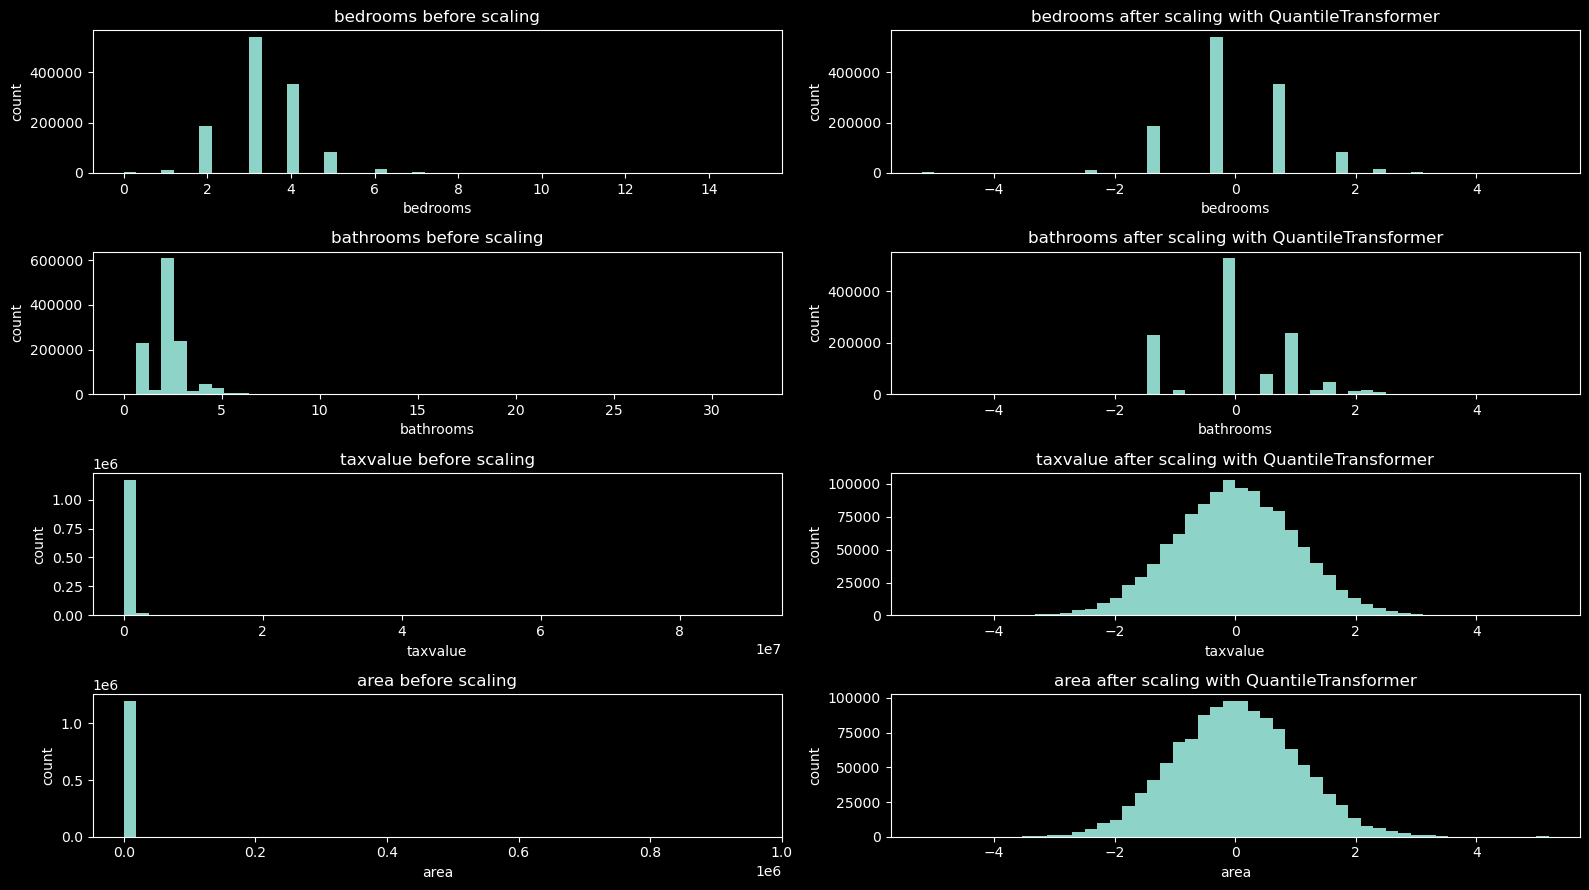

In [22]:
# QuantileTransformer Applied
visualize_scaler(scaler=QuantileTransformer(output_distribution='normal'), 
                 df=train,
                 columns_to_scale=columns_to_scale, 
                 bins=50)

# 4. Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?


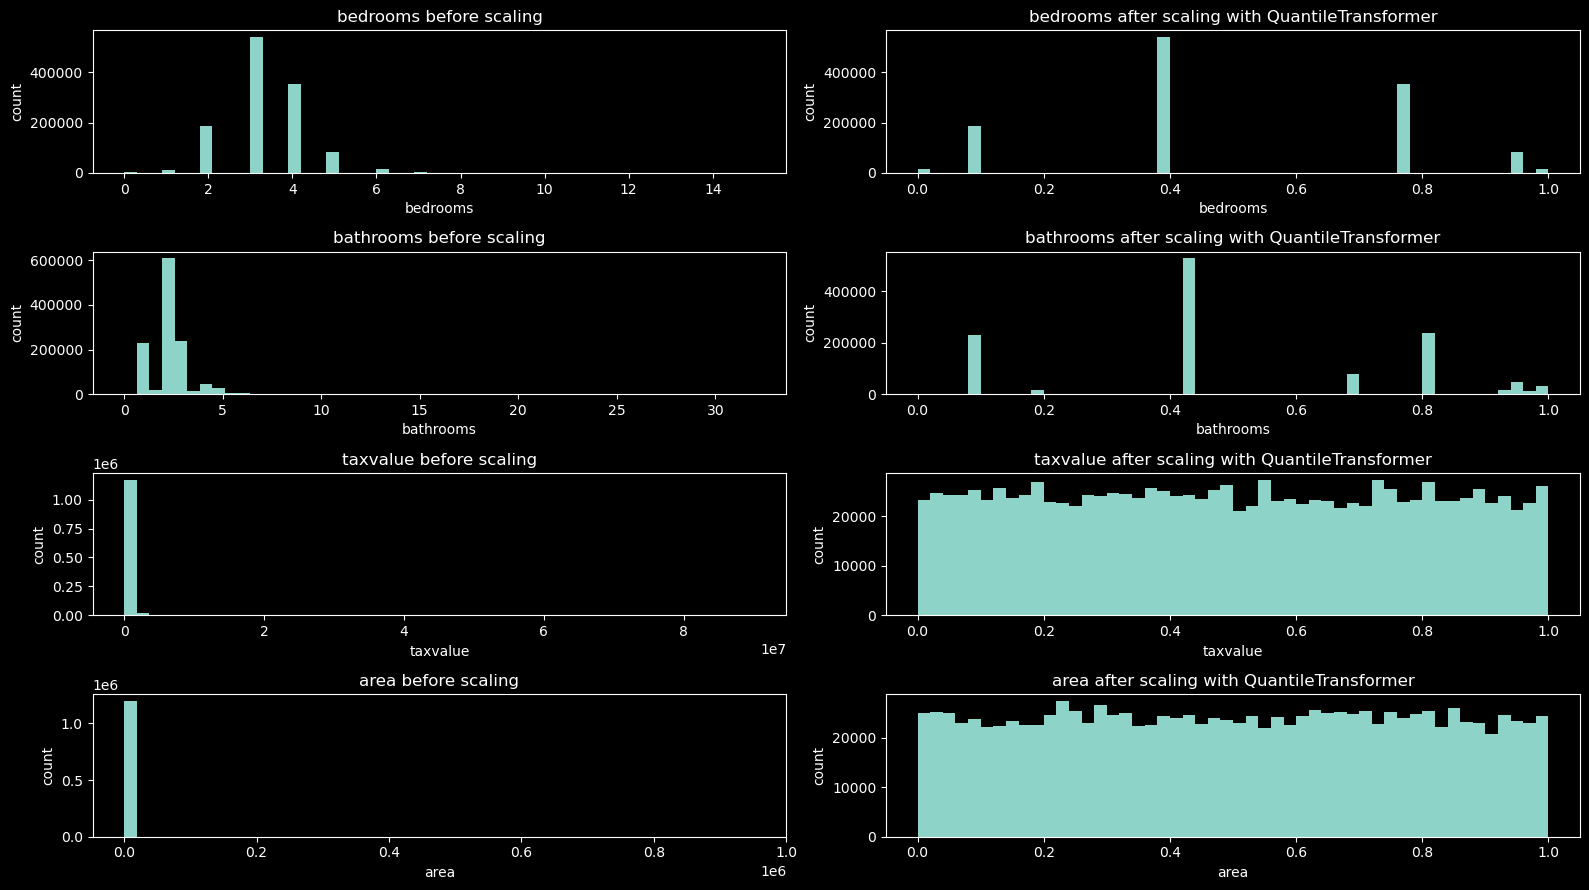

In [23]:
# QuantileTransformer Applied
visualize_scaler(scaler=QuantileTransformer(), 
                 df=train, 
                 columns_to_scale=columns_to_scale, 
                 bins=50)

# 5. Based on the work you've done, choose a scaling method for your dataset. Write a function within your wrangle.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each.


In [26]:

def scale_data(train, 
               validate, 
               test, 
               columns_to_scale=['bedrooms', 'bathrooms', 'taxvalue', 'area'],
               return_scaler=False):
    '''
    Scales the 3 data splits. 
    Takes in train, validate, and test data splits and returns their scaled counterparts.
    If return_scalar is True, the scaler object will be returned as well
    '''
    # make copies of our original data so we dont gronk up anything
    train_scaled = train.copy()
    validate_scaled = validate.copy()
    test_scaled = test.copy()
    #     make the thing
    scaler = MinMaxScaler()
    #     fit the thing
    scaler.fit(train[columns_to_scale])
    # applying the scaler:
    train_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(train[columns_to_scale]),
                                                  columns=train[columns_to_scale].columns.values).set_index([train.index.values])
                                                  
    validate_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(validate[columns_to_scale]),
                                                  columns=validate[columns_to_scale].columns.values).set_index([validate.index.values])
    
    test_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(test[columns_to_scale]),
                                                 columns=test[columns_to_scale].columns.values).set_index([test.index.values])
    
    if return_scaler:
        return scaler, train_scaled, validate_scaled, test_scaled
    else:
        return train_scaled, validate_scaled, test_scaled


In [27]:
scaler, train_scaled, validate_scaled, test_scaled = scale_data(train, validate, test, return_scaler=True)


In [28]:
scaler

MinMaxScaler()

In [29]:
train_scaled

,propertylandusedesc,bedrooms,bathrooms,area,taxvalue,yearbuilt,taxamount,county
1567873,Single Family Residential,0.200000,0.03125,0.001309,0.002124,1950,2712.21,6037
1218138,Single Family Residential,0.133333,0.06250,0.001391,0.014915,1950,16539.04,6037
339661,Single Family Residential,0.133333,0.03125,0.001104,0.003954,1953,4575.16,6037
1017133,Single Family Residential,0.200000,0.06250,0.001317,0.001941,1946,2635.51,6037
40250,Single Family Residential,0.200000,0.06250,0.001721,0.006020,1957,6344.96,6059
...,...,...,...,...,...,...,...,...
941799,Single Family Residential,0.133333,0.03125,0.000730,0.000307,1954,918.71,6037
631585,Single Family Residential,0.200000,0.09375,0.002184,0.006870,1987,7319.49,6037
883917,Single Family Residential,0.200000,0.06250,0.001828,0.002176,1957,2512.91,6037
1253096,Single Family Residential,0.266667,0.09375,0.002168,0.006845,1924,7650.55,6037


In [30]:
validate_scaled

,propertylandusedesc,bedrooms,bathrooms,area,taxvalue,yearbuilt,taxamount,county
539361,Single Family Residential,0.200000,0.062500,0.001451,0.000794,1957,992.07,6037
126612,Single Family Residential,0.133333,0.031250,0.001649,0.000540,1930,529.16,6059
1590950,Single Family Residential,0.266667,0.093750,0.002021,0.004867,1969,5097.76,6059
1282025,Single Family Residential,0.266667,0.078125,0.002096,0.004404,1979,4705.06,6111
1420451,Single Family Residential,0.333333,0.125000,0.007184,0.028359,1979,26119.96,6059
...,...,...,...,...,...,...,...,...
988389,Single Family Residential,0.200000,0.062500,0.001165,0.004890,1958,5268.24,6059
468006,Single Family Residential,0.133333,0.062500,0.000944,0.002147,1989,2821.13,6037
1026141,Single Family Residential,0.200000,0.093750,0.002996,0.003609,1978,4074.90,6037
1644940,Single Family Residential,0.200000,0.062500,0.001447,0.006226,1957,6546.16,6059


In [31]:
test_scaled

,propertylandusedesc,bedrooms,bathrooms,area,taxvalue,yearbuilt,taxamount,county
413974,Single Family Residential,0.200000,0.062500,0.001479,0.002070,1963,2762.63,6037
41333,Single Family Residential,0.133333,0.078125,0.002022,0.006513,1998,7195.94,6059
1796752,Single Family Residential,0.266667,0.109375,0.003456,0.008831,1992,9392.58,6059
1811458,Single Family Residential,0.200000,0.062500,0.001645,0.009408,1950,10316.55,6037
782643,Single Family Residential,0.266667,0.062500,0.001316,0.002787,1958,3129.82,6037
...,...,...,...,...,...,...,...,...
1320329,Single Family Residential,0.200000,0.062500,0.001200,0.004794,1952,5266.90,6037
1139341,Single Family Residential,0.266667,0.093750,0.002074,0.007917,1999,8096.12,6059
2062047,Single Family Residential,0.266667,0.062500,0.001776,0.001932,1978,2676.39,6037
1988667,Single Family Residential,0.266667,0.062500,0.001727,0.002313,1957,2705.42,6059
